# Machine Learning Modeling Task 1

Predict one or more of the following for a Specific Hospital and DRG Type for the 2025 year: 
Discharges
Median Costs
Median Charges

In [77]:
# importing packages for data manipulation
import pandas as pd
import numpy as np

In [78]:
# importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# importing packages for machine learning
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# Task 1

Predict one or more of the following for a Specific Hospital and DRG Type for the next 1 year: 
Discharges
Median Costs
Median Charges

# Feature Engineering 

In [80]:
# importing refined data
df = pd.read_csv("Refined_Data.csv")
df.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,Minor,M,Medical,2,8375.41,8375.41,3585.05,3585.05
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,Moderate,M,Medical,40,14029.82,12176.95,6182.67,5253.15
2,2016,4,Albany Memorial Hospital,194,3,Heart Failure,Major,M,Medical,70,23921.77,20229.81,11149.49,9068.10
3,2016,4,Albany Memorial Hospital,194,4,Heart Failure,Extreme,M,Medical,12,51260.45,35210.82,26081.70,15230.62
4,2016,4,Albany Memorial Hospital,196,4,Cardiac Arrest,Extreme,M,Medical,1,25357.84,25357.84,7791.75,7791.75


In [81]:
# select a specific hospital "Albany Memorial Hospital" (AMH) and DRG type "Heart Failure" (HF)
df_AMH_HF = df[
    (df["Facility Name"] == "Albany Memorial Hospital")
    & (df["APR DRG Description"] == "Heart Failure")
]
# only keep distinguishable features
df_AMH_HF = df_AMH_HF.drop(
    columns=[
        "APR DRG Code",
        "Facility Id",
        "Facility Name",
        "APR DRG Description",
        "APR Severity of Illness Description",
        "APR Medical Surgical Description",
        "APR Medical Surgical Code",
    ]
)
df_AMH_HF

,Year,APR Severity of Illness Code,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2016,1,2,8375.41,8375.41,3585.05,3585.05
1,2016,2,40,14029.82,12176.95,6182.67,5253.15
2,2016,3,70,23921.77,20229.81,11149.49,9068.10
3,2016,4,12,51260.45,35210.82,26081.70,15230.62
116427,2015,1,11,10281.21,10217.10,4285.12,3643.68
116428,2015,2,41,11841.11,11618.90,5041.79,4401.04
116429,2015,3,85,19917.18,16502.20,9380.37,7769.61
116430,2015,4,21,30782.00,26963.56,14485.83,13930.75
231308,2014,1,5,13138.38,9469.10,5467.13,4488.82
231309,2014,2,28,11322.56,10530.10,5440.55,4609.30


# Modeling 

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [83]:
# Function for RF model initializtion, optimizaion, evaluation and target prediction


def RF_Model(y):
    # Confirm prediction and split the data into training and testing sets
    X = df_AMH_HF.drop(columns=[y])
    y = df_AMH_HF[y]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Preprocess the dat
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), X.columns.tolist()),
        ]
    )

    # Create a pipeline with preprocessing and the Random Forest model
    rf_pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regressor", RandomForestRegressor(random_state=42)),
        ]
    )

    rf_pipeline.fit(X_train, y_train)
    y_pred = rf_pipeline.predict(X_test)
    print("RF Model Performance:")
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
    print("R^2 Score:", metrics.r2_score(y_test, y_pred))
    print("Explained Variance Score:", metrics.explained_variance_score(y_test, y_pred))

    # grid search for hyperparameter tuning
    param_grid_rf = {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [5, 10, 20, None],
        "regressor__min_samples_split": [2, 5, 10],
    }

    grid_search_rf = GridSearchCV(
        rf_pipeline, param_grid_rf, cv=5, scoring="neg_root_mean_squared_error"
    )

    grid_search_rf.fit(X_train, y_train)
    y_pred = grid_search_rf.predict(X_test)

    print("\nBest RF parameters:", grid_search_rf.best_params_)

    print("Best RF Model Performance:")
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
    print("R^2 Score:", metrics.r2_score(y_test, y_pred))
    print("Explained Variance Score:", metrics.explained_variance_score(y_test, y_pred))

    # Make Predictions when the Year is 2025, APR Severity code is 1,2,3 and 4 respctively
    print("\nPredictions for 2025 ")
    new_samples = []
    for code in [1, 2, 3, 4]:
        sample = {
            "Year": 2025,
            "APR Severity of Illness Code": code,
        }
        new_samples.append(sample)
    new_samples_df = pd.DataFrame(new_samples)

    # Complete the missing with the median values of the original dataset
    for col in X.columns:
        if col not in new_samples_df.columns:
            new_samples_df[col] = df_AMH_HF[col].median()  # Or 0 or another fallback
    new_samples_df = new_samples_df[X.columns]

    # Predict
    predicted_2025 = grid_search_rf.predict(new_samples_df)
    for i in [0, 1, 2, 3]:
        print("APR Severity:", i + 1, "Prediction:", predicted_2025[i])

In [84]:
# Target for Discharges
RF_Model("Discharges")

RF Model Performance:
Mean Absolute Error: 10.622857142857145
Mean Squared Error: 172.29068571428573
R^2 Score: 0.801471084564011
Explained Variance Score: 0.8702983350578497

Best RF parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best RF Model Performance:
Mean Absolute Error: 10.155462585034016
Mean Squared Error: 171.7113486651685
R^2 Score: 0.8021386491253585
Explained Variance Score: 0.8957047305596976

Predictions for 2025 
APR Severity: 1 Prediction: 13.598928571428571
APR Severity: 2 Prediction: 48.79715476190476
APR Severity: 3 Prediction: 52.74048809523808
APR Severity: 4 Prediction: 14.700428571428569


In [85]:
# Target for Mean Cost
RF_Model("Mean Cost")

RF Model Performance:
Mean Absolute Error: 311.4818142857143
Mean Squared Error: 133910.80002226133
R^2 Score: 0.9853578986996877
Explained Variance Score: 0.9883071539201198

Best RF parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best RF Model Performance:
Mean Absolute Error: 304.72913912698453
Mean Squared Error: 135273.92286569
R^2 Score: 0.9852088518509277
Explained Variance Score: 0.9891292722000511

Predictions for 2025 
APR Severity: 1 Prediction: 5785.595925000004
APR Severity: 2 Prediction: 5800.092125000004
APR Severity: 3 Prediction: 5844.936325000004
APR Severity: 4 Prediction: 5838.8784250000035


In [86]:
# Target for Mean Charge
RF_Model("Mean Charge")

RF Model Performance:
Mean Absolute Error: 1387.5533142857164
Mean Squared Error: 2705706.363909542
R^2 Score: 0.9218143140510949
Explained Variance Score: 0.921818801259888

Best RF parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best RF Model Performance:
Mean Absolute Error: 1301.7037150907051
Mean Squared Error: 2272878.4320173776
R^2 Score: 0.9343215650980775
Explained Variance Score: 0.9343975913772291

Predictions for 2025 
APR Severity: 1 Prediction: 12732.463271666662
APR Severity: 2 Prediction: 12882.455571666662
APR Severity: 3 Prediction: 13104.945621666662
APR Severity: 4 Prediction: 13050.472271666664


# Machine Learning Modeling Task 2


Predict the total expected discharges for each DRG Type for the State of New York		

In [87]:
# importing refined data agian
df = pd.read_csv("Refined_Data.csv")

# only keep distinguishable and correlaated columns
df = df[["Year", "APR DRG Code", "Discharges"]]

df.head()

,Year,APR DRG Code,Discharges
0,2016,194,2
1,2016,194,40
2,2016,194,70
3,2016,194,12
4,2016,196,1


In [88]:
# to add up the discharges for each year and APR DRG Code
df = df.groupby(["Year", "APR DRG Code"]).sum().reset_index()

In [89]:
df

,Year,APR DRG Code,Discharges
0,2009,1,431
1,2009,2,206
2,2009,3,1272
3,2009,4,3379
4,2009,5,4408
...,...,...,...
3164,2021,950,3547
3165,2021,951,5654
3166,2021,952,2394
3167,2021,955,473


In [90]:
# Function for RF model initializtion, evaluation and target prediction
# After testing, remove the grid_search optimiztion function to speed up


def RF_Model_2(Year, APR_DRG_Code):

    # Train-test split
    X = df[["Year", "APR DRG Code"]]
    y = df["Discharges"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Define preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), ["APR DRG Code"]),
            ("num", "passthrough", ["Year"]),
        ]
    )

    # Create a pipeline with preprocessing and the Random Forest model
    rf_pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regressor", RandomForestRegressor(random_state=42)),
        ]
    )

    rf_pipeline.fit(X_train, y_train)
    y_pred = rf_pipeline.predict(X_test)
    print("RF Model Performance:")
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
    print("R^2 Score:", metrics.r2_score(y_test, y_pred))
    print("Explained Variance Score:", metrics.explained_variance_score(y_test, y_pred))

    # grid search for hyperparameter tuning
    # param_grid_rf = {
    #     "regressor__n_estimators": [100, 200],
    #     "regressor__max_depth": [5, 10, 20, None],
    #     "regressor__min_samples_split": [2, 5, 10],
    # }

    # grid_search_rf = GridSearchCV(
    #     rf_pipeline, param_grid_rf, cv=5, scoring="neg_root_mean_squared_error"
    # )

    # grid_search_rf.fit(X_train, y_train)
    # y_pred = grid_search_rf.predict(X_test)

    # print("\nBest RF parameters:", grid_search_rf.best_params_)

    # print("Best RF Model Performance:")
    # print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
    # print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
    # print("R^2 Score:", metrics.r2_score(y_test, y_pred))
    # print("Explained Variance Score:", metrics.explained_variance_score(y_test, y_pred))

    # Make Predictions when output is Year and APR DRG Code
    print("\nPrediction ")
    new_samples = [{"Year": Year, "APR DRG Code": APR_DRG_Code}]
    new_samples_df = pd.DataFrame(new_samples)

    # Predict
    predicted = rf_pipeline.predict(new_samples_df)
    print(
        "Year:",
        Year,
        "\nAPR DRG Code:",
        APR_DRG_Code,
        "\nTotal_Discharges:",
        int(predicted[0]),
    )

In [91]:
RF_Model_2(int(input("type the year")), int(input("type the APR DRG Code")))
# Example for Year 2025 and APR DRG Code "1"

RF Model Performance:
Mean Absolute Error: 558.5793059936909
Mean Squared Error: 2408679.647075395
R^2 Score: 0.988122935528927
Explained Variance Score: 0.9881472794879825

Prediction 
Year: 2025 
APR DRG Code: 1 
Total_Discharges: 493


# Machine Learning Model Task 3
Predict the mean cost of a discharge using features like: **   Hospital, APR DRG code, Severity of illness, Year, Medical/Surgical classification	**

In [5]:
# importing refined data agian
df = pd.read_csv("Refined_Data.csv")

df.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,Minor,M,Medical,2,8375.41,8375.41,3585.05,3585.05
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,Moderate,M,Medical,40,14029.82,12176.95,6182.67,5253.15
2,2016,4,Albany Memorial Hospital,194,3,Heart Failure,Major,M,Medical,70,23921.77,20229.81,11149.49,9068.10
3,2016,4,Albany Memorial Hospital,194,4,Heart Failure,Extreme,M,Medical,12,51260.45,35210.82,26081.70,15230.62
4,2016,4,Albany Memorial Hospital,196,4,Cardiac Arrest,Extreme,M,Medical,1,25357.84,25357.84,7791.75,7791.75


In [ ]:
# keep distinguishable columns
df = df[
    [
        "Year",
        "Facility Id",
        "APR DRG Code",
        "APR Severity of Illness Code",
        "APR Medical Surgical Code",
        "Discharges",
        "Mean Cost",
    ]
]

In [10]:
df

,Year,Facility Id,APR DRG Code,APR Severity of Illness Code,APR Medical Surgical Code,Discharges,Mean Cost
0,2016,4,194,1,M,2,3585.05
1,2016,4,194,2,M,40,6182.67
2,2016,4,194,3,M,70,11149.49
3,2016,4,194,4,M,12,26081.70
4,2016,4,196,4,M,1,7791.75
...,...,...,...,...,...,...,...
1192822,2021,10355,950,1,P,10,32054.83
1192823,2021,10355,950,2,P,7,37249.02
1192824,2021,10355,950,3,P,1,58875.36
1192825,2021,10355,951,2,P,2,7181.56


In [ ]:
# Use LightGBM for feature importance with higher speed when processing 1 million rows
from lightgbm import LGBMRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
# lightgbm model for feature importance, evaluation and target prediction
def lightgbm (Year , Facility_Id, APR_DRG_Code, APR_Severity_Cod, APR_Medical_Code, Discharges):
    # Split dataset
    X = df.drop(columns=["Mean Cost"])
    y = df["Mean Cost"]
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

    # Define categorical and numerical columns
    categorical_cols = [
        "Facility Id",
        "APR DRG Code",
        "APR Severity of Illness Code",
        "APR Medical Surgical Code",
    ]
    numerical_cols = ["Year", "Discharges"]

# Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ("num", "passthrough", numerical_cols),
        ]
    )

    # LightGBM Model
    lgbm_model = LGBMRegressor(
        n_estimators=500, learning_rate=0.05, n_jobs=-1, random_state=42
    )

    # Full Pipeline
    lgbm_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", lgbm_model)])
    lgbm_pipeline.fit(X_train, y_train)

    # Predict
    y_pred = lgbm_pipeline.predict(X_test)

    # Evaluate
    print("\nModel Evaluation:")
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
    print("R^2 Score:", metrics.r2_score(y_test, y_pred))
    print("Explained Variance Score:", metrics.explained_variance_score(y_test, y_pred))

    # Calculte feature importances
    lgbm_fitted_model = lgbm_pipeline.named_steps["regressor"]

    # Then, get the feature names (from preprocessor)
    # For OneHotEncoder: Get the names after encoding
    ohe = lgbm_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
    encoded_cat_features = ohe.get_feature_names_out(categorical_cols)

    # Full feature names (numerical + encoded categorical)
    full_feature_names = list(encoded_cat_features) + numerical_cols

    # Now plot feature importances
    importances = pd.Series(
        lgbm_fitted_model.feature_importances_, index=full_feature_names
    )
    importances = importances.sort_values(ascending=False)

    print("\nFeature Importances:")
    print(importances)

    # Plot high importance feautures
    importances = importances[importances > 100]
    importances[importances > 100].plot(kind="bar", figsize=(20, 5))
    plt.title("Feature Importances from LightGBM")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    #  Predictions 
    print("\nPrediction ")
    new_samples_df = pd.DataFrame([{
        "Year": Year,
        "Facility Id": Facility_Id,
        "APR DRG Code": APR_DRG_Code,
        "APR Severity of Illness Code": APR_Severity_Cod,
        "APR Medical Surgical Code": APR_Medical_Code,
        "Discharges": Discharges
    }])

    predicted = lgbm_pipeline.predict(new_samples_df)
    print(
        "Discharges:",
        Discharges,
        "\nMean Cost:",
        predicted[0],
)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1446
[LightGBM] [Info] Number of data points in the train set: 954261, number of used features: 592
[LightGBM] [Info] Start training from score 19398.087174


/Users/Joey/miniconda3/envs/Data-ML/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



Model Evaluation:
Mean Absolute Error: 8028.125070792206
Mean Squared Error: 589496124.3481584
R^2 Score: 0.515019998945614
Explained Variance Score: 0.5150210413165219

Feature Importances:
APR Severity of Illness Code_4    1800
Year                              1551
Discharges                         702
APR Medical Surgical Code_M        529
APR Severity of Illness Code_3     348
                                  ... 
APR DRG Code_142                     0
APR DRG Code_138                     0
Facility Id_2                        0
APR DRG Code_136                     0
APR DRG Code_137                     0
Length: 594, dtype: int32


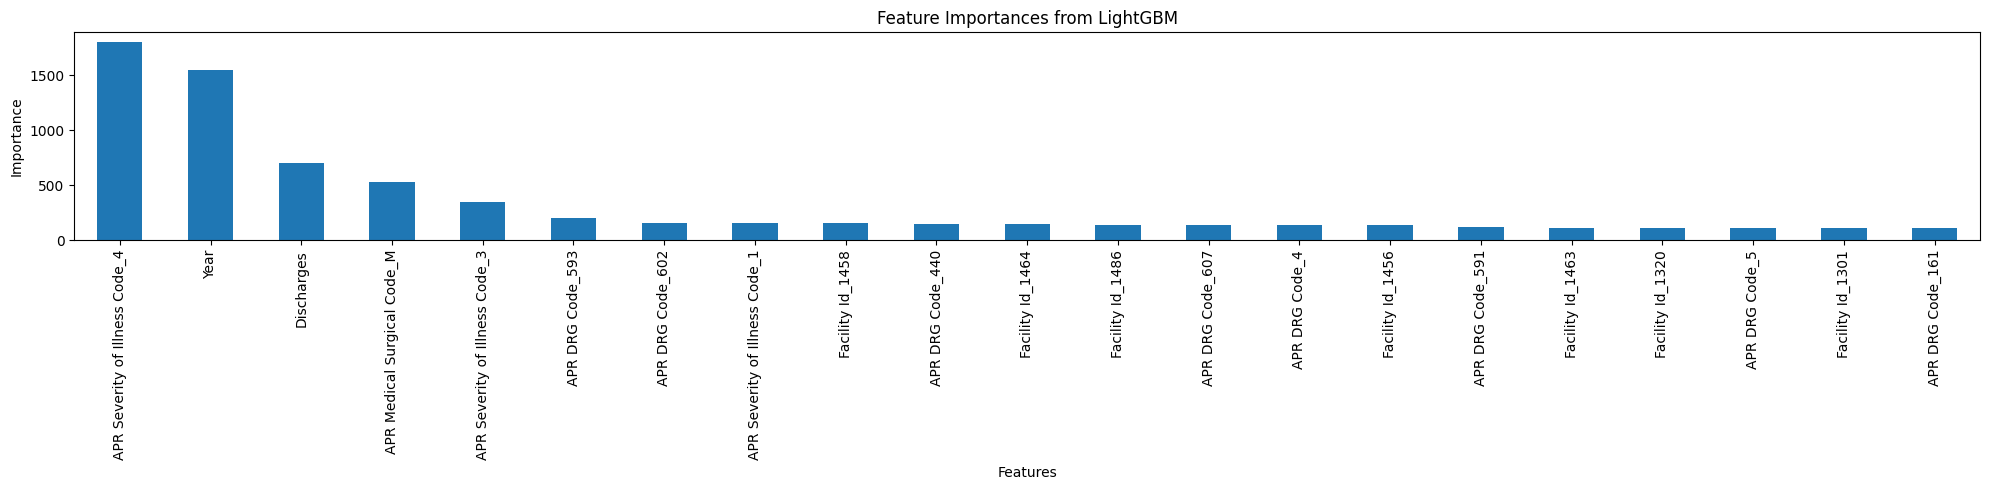


Prediction 
Discharges: 2 
Mean Cost: 8285.502314478987


/Users/Joey/miniconda3/envs/Data-ML/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [76]:
lightgbm(
    Year=int(input("Year: ")),
    Facility_Id=input("Facility Id: "),
    APR_DRG_Code=input("APR DRG Code: "),
    APR_Severity_Cod=input("APR Severity Code: "),
    APR_Medical_Code=input("APR Medical Code: "),
    Discharges=int(input("Discharges: "))
)

Example are discharge = 2 with desired features